In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [3]:
from scipy.cluster.hierarchy import dendrogram,fcluster,linkage
from scipy.stats import zscore

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
bank_df=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\16.Data Mining-Week-5\\bank_marketing_part1_Data-1.csv')

In [6]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [7]:
bank_df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [9]:
bank_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


From above Summary of variables we could note that 'spending' and  'advance_payments' lie in one category of range while</br>
rest of the variables in another range.Since clustering techniques mainly involves calculating distance between points in</br>
a cluster it is better to scale the variables so that all are in a particular range otherwise distance calculated will</br>
lead to wrong clustering/categorisation.

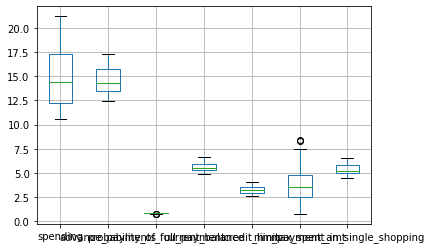

In [10]:
bank_df.boxplot()

Statistically these plots depicts that there are outliers,but when looked at a perspective from this business approach</br>
we can conclude this is not a deviation from normal behavior(not an outlier)

In [11]:
heir1_bank=bank_df.copy()

In [12]:
heir2_bank=bank_df.copy()

In [13]:
KMean_bank=bank_df.copy()

In [14]:
sc_bank_df=bank_df.apply(zscore)

In [15]:
sc_bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [16]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


<b>Agglomerative/Heirarchical</b>

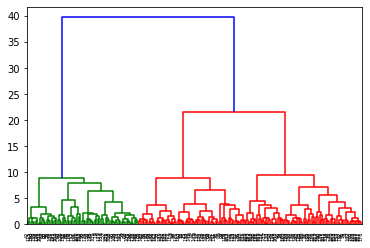

In [17]:
wlink=linkage(sc_bank_df,method='ward')
dgram=dendrogram(wlink)

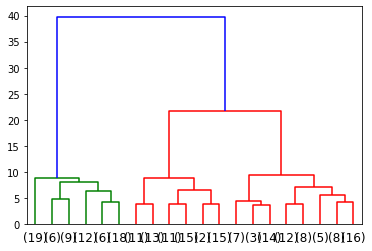

In [18]:
dgram=dendrogram(wlink,p=20,truncate_mode='lastp')

Based on business approach we could select either 2 or 3 as no:of cluster,while mathematical approach of selection of 
no:of clusters</br>
can be based on silhouete score.Here we could select based on both Business and statistical approach.</br>
2 classifications based on the credit usage:Light user or Heavy user</br>
Similarly 3 classifications would be:Light,Medium or Heavy.

In [19]:
h_clusters=fcluster(wlink,15,criterion='distance')

In [20]:
h_clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

We could see there is an improvement in score as we move higher up the dendrogram/as clusters reduced.</br>
Here we select 3 clusters instead of 2 since 2 clusters formed at length 25 is due to property of Agglomerative clustering</br>
and not because of the similarity of data points hence for this case we take 3 as optimal no of clusters for seggregation</br>
of customers


<b>KMeans</b>

In [42]:
wss=[]

In [43]:
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(sc_bank_df)
    wss.append(km.inertia_)

In [44]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.301721277542,
 327.99669125815456,
 289.26681770892736,
 263.1068038591345,
 241.70893456432825,
 220.76230412935047,
 205.94704714782335]

In [24]:
import matplotlib.pyplot as plt

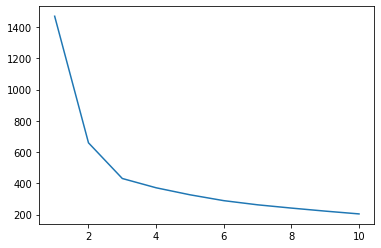

In [25]:
plt.plot(range(1,11),wss)

In [26]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(sc_bank_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
labels1=kmeans.labels_

In [68]:
print('Sil-score K=2 ',silhouette_score(sc_bank_df,labels1))


Sil-score K=2  0.46577247686580914


In [55]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(sc_bank_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
labels=kmeans.labels_

In [69]:
print('Sil-score K=3 ',silhouette_score(sc_bank_df,labels))

Sil-score K=3  0.4007270552751299


In [58]:
labels=kmeans.labels_

In [59]:
labels

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [60]:
KMean_bank['KClusters']=labels

In [61]:
KMean_bank['HClusters']=h_clusters

In [63]:
KMean_bank.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,KClusters,HClusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2,2
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,2
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,0,3
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,2


Data set which contains cluster number of KMeans algorithm and Agglomerative algorithm.<br/>
1 of Kmeans corresponds to 1 of Fcluster.            <br/>
2 of Kmeans corresponds to 2 of Fcluster.            <br/>
0 of Kmeans corresponds to 3 of Fcluster.            <br/>
We will use one of the clustering techniques to give recommendation.Here we will use KMeans clusters to seggregate.

In [64]:
bank_df['Clusters']=labels

In [65]:
bank_df.to_csv('D:\\ANALYTICS\\GREAT LEARNING\\16.Data Mining-Week-5\\Bank_Recommendation.csv')